In [ ]:
import zipfile
import os

# Specify the path to the zip file you want to unzip
zip_file_path = "validation.zip"

# Specify the path where you want to extract the contents
extracted_folder_path = "validation"

# Create the extracted folder if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Unzip the zip file into the extracted folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


print("Zip file has been extracted, and a new 'validate' folder has been created.")



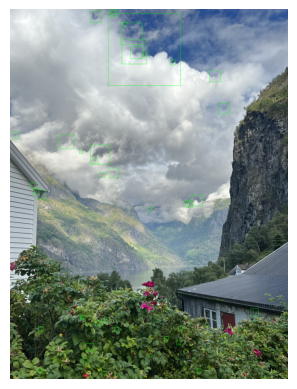

In [26]:
# Import necessary libraries
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random


# Load the image
image = Image.open("NatGeo/aeye1.jpg")  # Replace with your image path
image = image.rotate(-90, expand=True)
image_array = np.array(image)

# Preprocess the image
image_grayscale = tf.image.rgb_to_grayscale(image_array)

# Fix the data type issue
image_normalized = tf.cast(image_grayscale, tf.float32) / 255.0

# Get the base directory where OpenCV is installed
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))

# Path to the Eye Detection Haar Cascade XML file
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_eye.xml')

# Create a CascadeClassifier object for eye detection
eye_cascade = cv2.CascadeClassifier(haar_model)

# Check if the cascade is loaded correctly
if eye_cascade.empty():
    raise ValueError("The Eye Detection Haar Cascade XML file could not be loaded.")
    
# Detect eyes in the image
eyes = eye_cascade.detectMultiScale(image_array, scaleFactor=1.05, minNeighbors=3, minSize=(30, 30))

# Draw bounding boxes around the detected eyes
for (x, y, w, h) in eyes:
    cv2.rectangle(image_array, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(image_array)
plt.axis('off')  # Removes the axis labels
plt.show()    


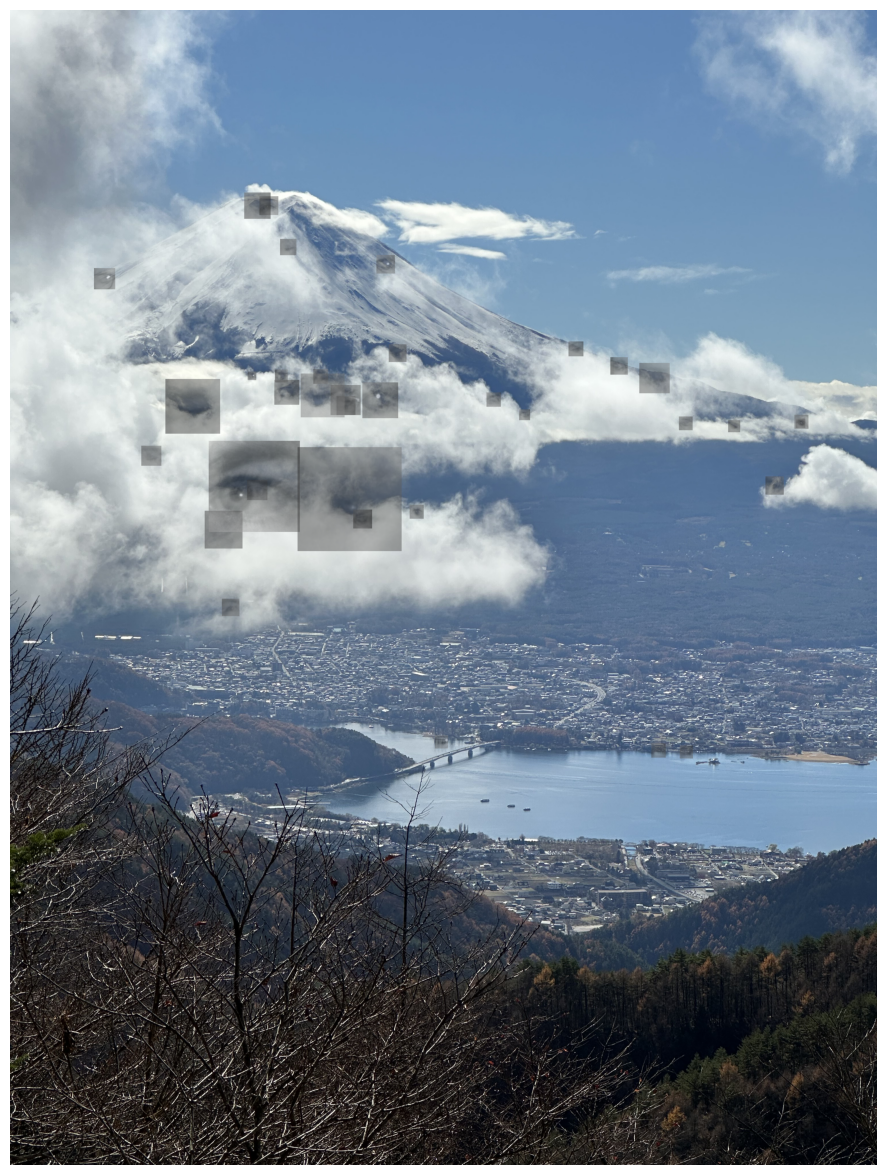

In [206]:
# Import necessary libraries
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

# This line ensures that the plot is displayed in full width
plt.rcParams['figure.figsize'] = [20, 15]  # You can adjust the values here as needed

# Load the image
image = Image.open("NatGeo/aye3.jpg")  # Replace with your image path
image = image.rotate(-90, expand=True)
image_array = np.array(image)

# Preprocess the image
image_grayscale = tf.image.rgb_to_grayscale(image_array)
image_normalized = tf.cast(image_grayscale, tf.float32) / 255.0

# Get the base directory where OpenCV is installed
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))

# Path to the Eye Detection Haar Cascade XML file
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_eye.xml')

# Create a CascadeClassifier object for eye detection
eye_cascade = cv2.CascadeClassifier(haar_model)

# Check if the cascade is loaded correctly
if eye_cascade.empty():
    raise ValueError("The Eye Detection Haar Cascade XML file could not be loaded.")

# Convert image to grayscale for OpenCV processing
image_array_gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

# Detect eyes in the image
eyes = eye_cascade.detectMultiScale(image_array_gray, scaleFactor=1.05, minNeighbors=3, minSize=(30, 30))

# Function to overlay an image on top of another
def overlay_image(background, overlay, x, y, w, h, alpha=0.5):
    # Resize the overlay
    overlay_resized = cv2.resize(overlay, (w, h))

    # Check if the overlay image is grayscale and convert it to RGB
    if len(overlay_resized.shape) == 2:  # Grayscale image
        overlay_rgb = cv2.cvtColor(overlay_resized, cv2.COLOR_GRAY2RGB)
    elif overlay_resized.shape[2] == 4:  # RGBA image
        overlay_rgb = overlay_resized[:,:,:3]  # Extract RGB part
    else:
        overlay_rgb = overlay_resized  # Already RGB

    # Perform the overlay
    background_part = background[y:y+h, x:x+w]
    alpha = 0.50 # Lowering the alpha value to make the overlay more transparent
    blended_part = cv2.addWeighted(overlay_rgb, alpha, background_part, 1 - alpha, 0)
    #blended_part = cv2.addWeighted(overlay_rgb, alpha, background_part, 1 - alpha, 0, background_part)
    background[y:y+h, x:x+w] = blended_part

# List all files in the validation folder
eye_images = os.listdir("validation")  # Replace with your folder path

# Overlay random eye images over detected eyes
for (x, y, w, h) in eyes:
    random_eye_image_path = os.path.join("validation", random.choice(eye_images))
    random_eye_image = cv2.imread(random_eye_image_path, cv2.IMREAD_UNCHANGED) # Ensure alpha channel is read

    # Check if the image was loaded correctly
    if random_eye_image is None:
        print(f"Failed to load image from {random_eye_image_path}")
        continue

    # Proceed if the image is valid
    overlay_image(image_array, random_eye_image, x, y, w, h, alpha=0.50)


# Display the image with overlays
plt.imshow(image_array)
plt.axis('off')  # Removes the axis labels
plt.show()


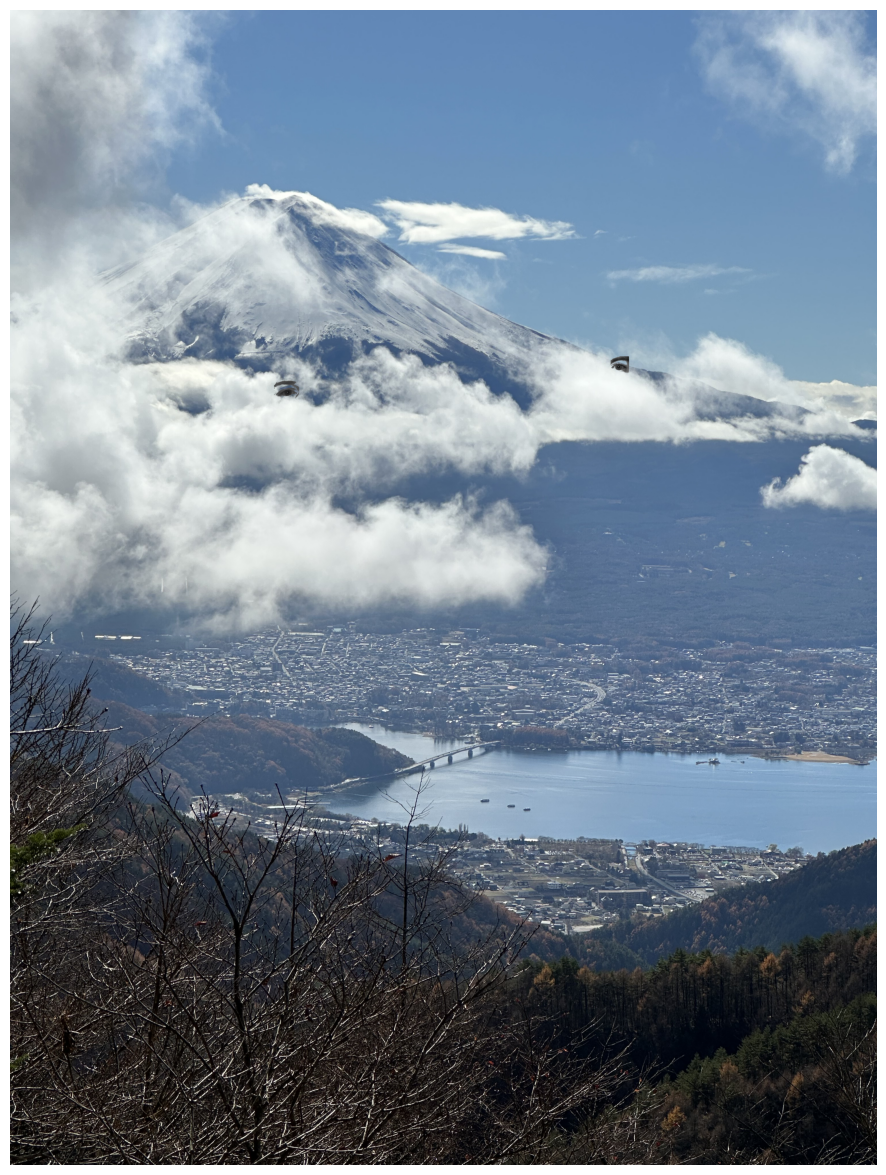

In [242]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot as plt

# This line ensures that the plot is displayed in full width
plt.rcParams['figure.figsize'] = [20, 15]  # You can adjust the values here as needed

# Load the image
image = Image.open("NatGeo/aye3.jpg")  # Replace with your image path
image = image.rotate(-90, expand=True)
image_array = np.array(image)

# Preprocess the image
image_grayscale = tf.image.rgb_to_grayscale(image_array)
image_normalized = tf.cast(image_grayscale, tf.float32) / 255.0

# Get the base directory where OpenCV is installed
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))

# Path to the Eye Detection Haar Cascade XML file
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_eye.xml')

# Create a CascadeClassifier object for eye detection
eye_cascade = cv2.CascadeClassifier(haar_model)

# Check if the cascade is loaded correctly
if eye_cascade.empty():
    raise ValueError("The Eye Detection Haar Cascade XML file could not be loaded.")

# Convert image to grayscale for OpenCV processing
image_array_gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

# Detect eyes in the image
eyes = eye_cascade.detectMultiScale(image_array_gray, scaleFactor=1.20, minNeighbors=8, minSize=(40, 40))

def overlay_image(background, overlay, x, y, w, h, alpha=0.5):
    # Resize the overlay to fit the region of interest
    overlay_resized = cv2.resize(overlay, (w, h))

    # Check if the overlay image has an alpha channel
    if overlay_resized.shape[2] == 4:
        overlay_alpha = overlay_resized[:, :, 3] / 255.0
        overlay_image = overlay_resized[:, :, :3]
    else:
        # Create an alpha channel filled with the alpha value
        overlay_alpha = np.full((overlay_resized.shape[0], overlay_resized.shape[1]), alpha, dtype=np.float32)
        overlay_image = overlay_resized

    # Extract the region of interest from the background
    background_part = background[y:y+h, x:x+w]

    # Perform the overlay using the alpha channel
    for c in range(3):  # loop over color channels
        background_part[:, :, c] = (overlay_image[:, :, c] * overlay_alpha +
                                    background_part[:, :, c] * (1 - overlay_alpha))

    # Place the blended part back into the background image
    background[y:y+h, x:x+w] = background_part

    return background  # Return the modified background


# ... [rest of your code for loading the image and detecting eyes] ...

# Before the loop, check if image_array is valid
if image_array is None:
    raise ValueError("image_array is None. Ensure that the image is loaded correctly.")

# Loop over detected eyes and apply the overlay
for (x, y, w, h) in eyes:
    random_eye_image_path = os.path.join("result", random.choice(os.listdir("result")))
    random_eye_image = cv2.imread(random_eye_image_path, cv2.IMREAD_UNCHANGED)  # Load with alpha channel if present

    if random_eye_image is None:
        print(f"Failed to load image from {random_eye_image_path}")
        continue

    # Overlay the image and update image_array with the result
    image_array = overlay_image(image_array, random_eye_image, x, y, w, h, alpha=0.50)

# Display the image with overlays
plt.imshow(image_array)
plt.axis('off')  # Removes the axis labels
plt.show()



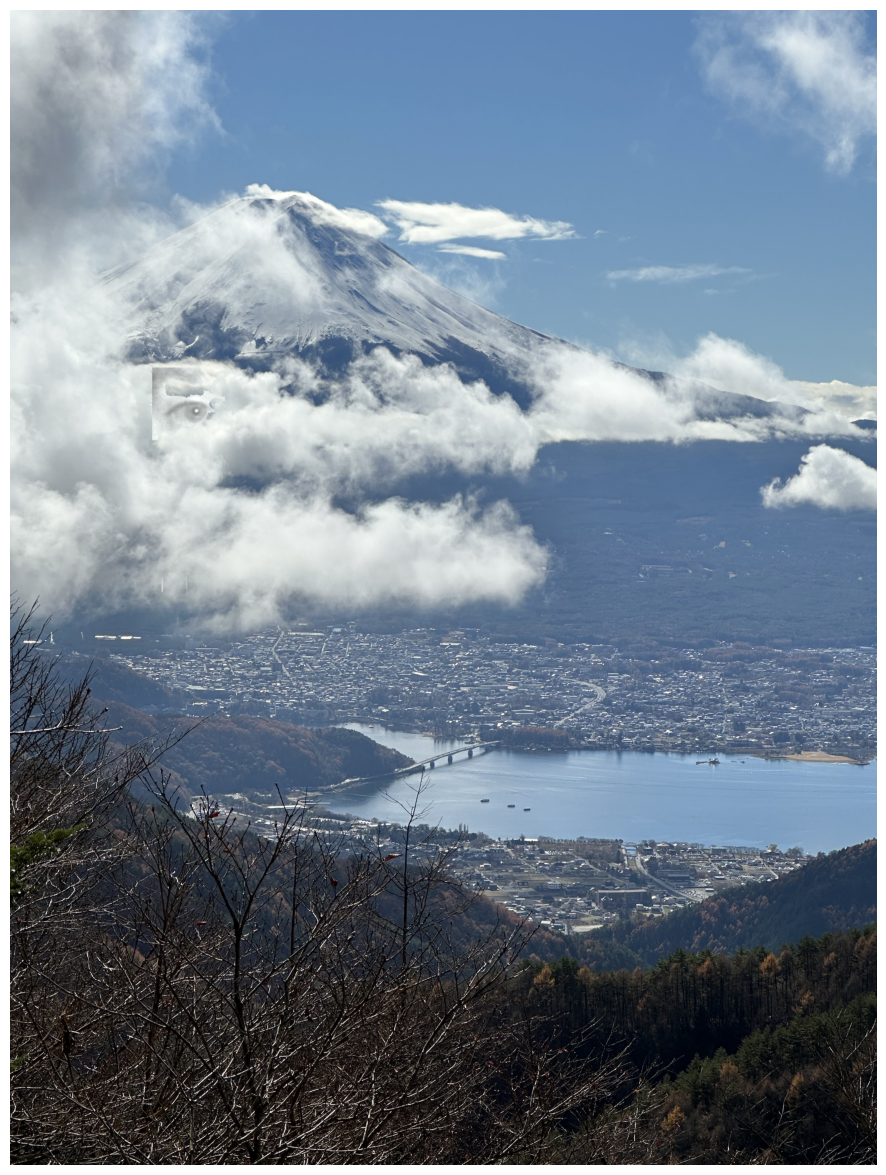

In [265]:
import cv2
import numpy as np
import os
import random
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

# This line ensures that the plot is displayed in full width
plt.rcParams['figure.figsize'] = [20, 15]  # You can adjust the values here as needed

# Load the image
image = Image.open("NatGeo/aye3.jpg")  # Replace with your image path
image = image.rotate(-90, expand=True)
image_array = np.array(image)

# Preprocess the image
image_grayscale = tf.image.rgb_to_grayscale(image_array)
image_normalized = tf.cast(image_grayscale, tf.float32) / 255.0

# Get the base directory where OpenCV is installed
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))

# Path to the Eye Detection Haar Cascade XML file
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_eye.xml')

# Create a CascadeClassifier object for eye detection
eye_cascade = cv2.CascadeClassifier(haar_model)

# Check if the cascade is loaded correctly
if eye_cascade.empty():
    raise ValueError("The Eye Detection Haar Cascade XML file could not be loaded.")

# Convert image to grayscale for OpenCV processing
image_array_gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

# Detect eyes in the image
eyes = eye_cascade.detectMultiScale(image_array_gray, scaleFactor=1.10, minNeighbors=5, minSize=(180, 180))

def match_color(target, source, mask=None):
    """
    Adjust the color balance and brightness of the source to match the target.
    """
    if mask is not None:
        mask = mask.astype(bool)
        source = source * mask[:, :, None]  # Apply mask to source
        target = target * mask[:, :, None]  # Apply mask to target

    # Convert to float to prevent clipping values
    source = source.astype('float32')
    target = target.astype('float32')

    # Split channels
    source_channels = cv2.split(source)
    target_channels = cv2.split(target)

    # Calculate mean and standard deviation of each channel
    output_channels = []
    for s_channel, t_channel in zip(source_channels, target_channels):
        s_mean, s_std = cv2.meanStdDev(s_channel)
        t_mean, t_std = cv2.meanStdDev(t_channel)

        # Normalize channels
        s_channel = (s_channel - s_mean) / (s_std + 1e-6)
        t_channel = s_channel * t_std + t_mean

        # Clip values to [0, 255]
        t_channel = np.clip(t_channel, 0, 255)

        output_channels.append(t_channel)

    # Merge channels
    matched = cv2.merge(output_channels).astype('uint8')

    return matched

def overlay_image(background, overlay, x, y, w, h, alpha=0.5):
    # Resize the overlay to fit the region of interest
    overlay_resized = cv2.resize(overlay, (w, h))

    # Check if the overlay image has an alpha channel
    if overlay_resized.shape[2] == 4:
        overlay_alpha = overlay_resized[:, :, 3] / 255.0
        overlay_image = overlay_resized[:, :, :3]
    else:
        overlay_alpha = np.full((overlay_resized.shape[0], overlay_resized.shape[1]), alpha, dtype=np.float32)
        overlay_image = overlay_resized

    # Extract the region of interest from the background
    background_part = background[y:y+h, x:x+w]

    # Match the color of the overlay with the part of the background it will be placed on
    overlay_image_matched = match_color(background_part, overlay_image, mask=overlay_alpha)

    # Perform the overlay using the alpha channel
    for c in range(3):  # loop over color channels
        background_part[:, :, c] = (overlay_image_matched[:, :, c] * overlay_alpha +
                                    background_part[:, :, c] * (1 - overlay_alpha))

    # Place the blended part back into the background image
    background[y:y+h, x:x+w] = background_part

    return background  # Return the modified background

# Before the loop, check if image_array is valid
if image_array is None:
    raise ValueError("image_array is None. Ensure that the image is loaded correctly.")

# Loop over detected eyes and apply the overlay
for (x, y, w, h) in eyes:
    random_eye_image_path = os.path.join("result", random.choice(os.listdir("result")))
    random_eye_image = cv2.imread(random_eye_image_path, cv2.IMREAD_UNCHANGED)  # Load with alpha channel if present

    if random_eye_image is None:
        print(f"Failed to load image from {random_eye_image_path}")
        continue

     # Overlay the image and update image_array with the result
    image_array = overlay_image(image_array, random_eye_image, x, y, w, h, alpha=0.50)

# Display the image with overlays
plt.imshow(image_array)
plt.axis('off')  # Removes the axis labels
plt.show()



In [ ]:
from flask import Flask, request, jsonify
import Aeye.ipynb  # Import functions from your notebook after converting it to a .py file

app = Flask(__name__)

@app.route('/process-image', methods=['POST'])
def process_image():
    # Example: Expecting a file in the request
    if 'file' not in request.files:
        return jsonify({'error': 'No file provided'}), 400
    
    file = request.files['file']
    # Process the file using your notebook's logic
    result = your_notebook_module.process_file(file)
    
    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')


In [ ]:
jupyter nbconvert --to script Aeye.ipynb

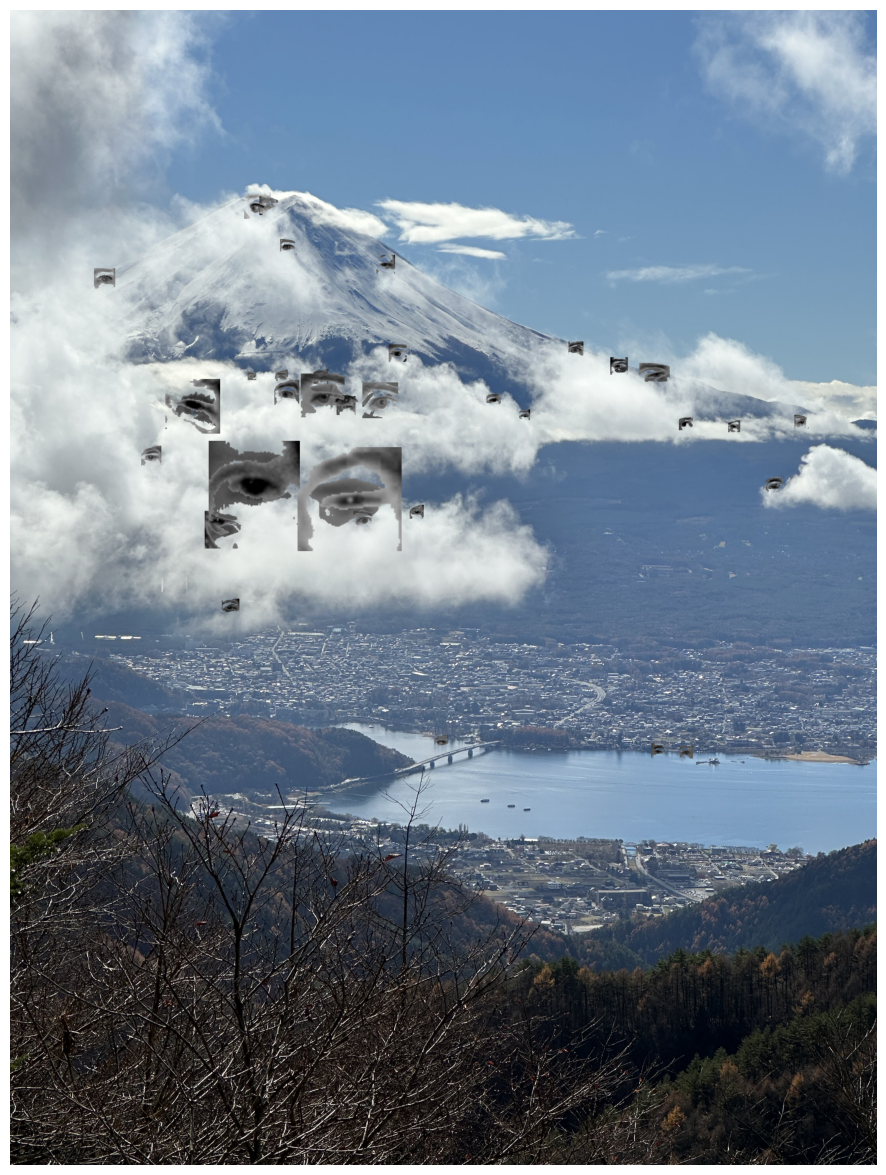

In [236]:
import cv2
import numpy as np
import os
import random
from PIL import Image


def adjust_brightness_contrast(source, target):
    """
    Adjust the brightness and contrast of the source to match the target.
    """
    # Calculate the mean and standard deviation of both images
    source_mean, source_std = np.mean(source), np.std(source)
    target_mean, target_std = np.mean(target), np.std(target)

    # Avoid division by zero
    if source_std == 0 or target_std == 0:
        return source

    # Adjust the source image to match the target
    result = source.astype(np.float32)
    result = ((result - source_mean) * (target_std / source_std)) + target_mean
    result = np.clip(result, 0, 255)

    return result.astype(np.uint8)

def overlay_image(background, overlay, x, y, w, h, alpha=0.5):
    # Resize the overlay to fit the region of interest
    overlay_resized = cv2.resize(overlay, (w, h))
    
    # Extract the region of interest from the background
    background_part = background[y:y+h, x:x+w]

    # If the overlay image has an alpha channel, separate it and create a mask
    if overlay_resized.shape[2] == 4:
        overlay_alpha = overlay_resized[:, :, 3] / 255.0
        overlay_image_only = overlay_resized[:, :, :3]
    else:
        overlay_alpha = np.full((overlay_resized.shape[0], overlay_resized.shape[1]), alpha, dtype=np.float32)
        overlay_image_only = overlay_resized

    # Adjust brightness and contrast of the overlay
    overlay_image_only = adjust_brightness_contrast(overlay_image_only, background_part)

    # Blend the overlay and the background part
    combined = overlay_alpha[:, :, np.newaxis] * overlay_image_only + (1 - overlay_alpha[:, :, np.newaxis]) * background_part

    # Place the blended part back into the background image
    background[y:y+h, x:x+w] = combined.astype(np.uint8)

    return background  # Return the modified background

# Load the image
# Before the loop, check if image_array is valid
if image_array is None:
    raise ValueError("image_array is None. Ensure that the image is loaded correctly.")

# Loop over detected eyes and apply the overlay
for (x, y, w, h) in eyes:
    random_eye_image_path = os.path.join("result", random.choice(os.listdir("result")))
    random_eye_image = cv2.imread(random_eye_image_path, cv2.IMREAD_UNCHANGED)  # Load with alpha channel if present

    if random_eye_image is None:
        print(f"Failed to load image from {random_eye_image_path}")
        continue

    # Overlay the image and update image_array with the result
    image_array = overlay_image(image_array, random_eye_image, x, y, w, h, alpha=0.50)

# Display the image with overlays
plt.imshow(image_array)
plt.axis('off')  # Removes the axis labels
plt.show()


In [131]:
'''This code simply pruned a larger dataset of eyes to
only include the ones that were open and in good lighting'''

import os
import shutil

# Define the path to the validation directory
validation_dir = 'validation'
# Define the path to the directory where the pruned images will be stored
pruned_dir = 'pruned'

# Ensure the pruned directory exists
if not os.path.exists(pruned_dir):
    os.makedirs(pruned_dir)

# Function to check if the image meets the criteria
def is_image_valid(filename):
    # Parse the filename to get the annotations
    parts = filename.split('_')
    # Check for glasses, eye state, and lighting conditions
    glasses = parts[3]
    eye_state = parts[4]
    lighting = parts[6]
    # Keep the image if it has no glasses, is open-eyed, and well-lit
    return glasses == '0' and eye_state == '1' and lighting == '1'

# Iterate over all files in the validation directory
for filename in os.listdir(validation_dir):
    if filename.lower().endswith('.png'):
        if is_image_valid(filename):
            # If the image meets the criteria, move it to the pruned directory
            src_path = os.path.join(validation_dir, filename)
            dst_path = os.path.join(pruned_dir, filename)
            shutil.move(src_path, dst_path)


Note: you may need to restart the kernel to use updated packages.


In [143]:
import cv2
import numpy as np
import os

def add_transparency_to_gray_image(gray_image, transparency_threshold):
    # Threshold the grayscale image to create a binary mask where we want to keep the pixels
    _, binary_mask = cv2.threshold(gray_image, transparency_threshold, 255, cv2.THRESH_BINARY)

    # Invert the binary mask to get the transparency mask (where the background is to be transparent)
    transparency_mask = cv2.bitwise_not(binary_mask)

    # Stack the grayscale image to make it BGRA (so we can add an alpha channel)
    bgra_image = np.stack((gray_image, gray_image, gray_image, transparency_mask), axis=-1)

    return bgra_image

# Define the paths to the 'test' and 'result' directories
test_dir = 'test'  # Replace with the correct path to your 'test' directory
result_dir = 'result'  # Replace with the correct path to your 'result' directory

# Create the 'result' directory if it doesn't exist
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# Iterate over all files in the 'test' directory
for filename in os.listdir(test_dir):
    if filename.lower().endswith('.png'):
        image_path = os.path.join(test_dir, filename)

        # Load the image in grayscale mode
        img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image has been successfully loaded
        if img_gray is None:
            print(f"Failed to load image: {filename}")
            continue

        # Define a threshold value to distinguish the eye from the background
        transparency_threshold = 128  # Mid-range value, to be tuned for specific images

        # Add transparency to the image based on the grayscale intensity
        img_with_transparency = add_transparency_to_gray_image(img_gray, transparency_threshold)

        # Resize the image to 30x30 pixels
        #resized_image = cv2.resize(img_with_transparency, (30, 30), interpolation=cv2.INTER_AREA)

        # Save the processed image
        result_path = os.path.join(result_dir, filename)
        cv2.imwrite(result_path, resized_image)

# Inform where the processed images are saved
print(f"Processed images are saved in: {result_dir}")


Processed images are saved in: result


In [226]:
'''This code applies the Otsu threshold to all over our pruned images
that contain eyes we will overlay on our users photo'''


import cv2
import numpy as np
import os

def bgremove_otsu(myimage):
    # Check if image is already grayscale
    if len(myimage.shape) < 3 or myimage.shape[2] == 1:
        myimage_grey = myimage  # The image is already grayscale
    else:
        # Convert to Grayscale
        myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
    
    # Apply Otsu's thresholding to get the mask
    _, binary_mask = cv2.threshold(myimage_grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the binary mask to create the transparency mask
    transparency_mask = cv2.bitwise_not(binary_mask)
    
    # Stack the grayscale image to make it BGRA (so we can add an alpha channel)
    bgra_image = np.dstack((myimage_grey, myimage_grey, myimage_grey, transparency_mask))

    return bgra_image

# Define the paths to the 'test' and 'result' directories
test_dir = 'pruned'  # Replace with the actual path to your 'test' directory
result_dir = 'result'  # Replace with the actual path to your 'result' directory

# Create the 'result' directory if it doesn't exist
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# Iterate over all files in the 'test' directory
for filename in os.listdir(test_dir):
    if filename.lower().endswith('.png'):
        image_path = os.path.join(test_dir, filename)
        myimage = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        if myimage is None:
            print(f"Failed to load image: {filename}")
            continue
        final_image = bgremove_otsu(myimage)
        result_path = os.path.join(result_dir, filename)
        cv2.imwrite(result_path, final_image)

print(f"Processed images are saved in: {result_dir}")


Processed images are saved in: result


In [224]:
''''These functions are tests to find the best otsu threshold
for the eye images we are going to overlay'''

import cv2
import numpy as np
import os

def bgremove_otsu(myimage, min_threshold, max_threshold):
    # Convert to grayscale if the image is not already in grayscale
    if len(myimage.shape) < 3 or myimage.shape[2] == 1:
        myimage_grey = myimage  # The image is already grayscale
    else:
        myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding with the given thresholds
    _, binary_mask = cv2.threshold(myimage_grey, 150, 250, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the binary mask to create the transparency mask
    transparency_mask = cv2.bitwise_not(binary_mask)
    
    # Stack the grayscale image to make it BGRA (so we can add an alpha channel)
    bgra_image = np.dstack((myimage_grey, myimage_grey, myimage_grey, transparency_mask))
    
    return bgra_image

def apply_thresholds_and_save(image_path, thresholds, results_dir):
    # Ensure the results directory exists
    os.makedirs(results_dir, exist_ok=True)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Apply each set of thresholds and save the resulting images
    for min_thresh, max_thresh in thresholds:
        result_image = bgremove_otsu(image, min_thresh, max_thresh)
        file_name = f'min{min_thresh}max{max_thresh}.png'
        cv2.imwrite(os.path.join(results_dir, file_name), result_image)

# Define your thresholds here; for more dramatic thresholds, increase the differences between them
thresholds = [
    (0, 100),
    (50, 150),
    (100, 200),
    (150, 250),
    (200, 255)
]

# Set the path to your input image
image_path = 'test/test1.png'  # Replace with the path to your image

# Set the path to the results directory
results_dir = 'otsuResults'

# Call the function to apply thresholds and save the results
apply_thresholds_and_save(image_path, thresholds, results_dir)


In [262]:
'''This code is an update of the otsu threshold detection
to make cleaner looking eye images'''

import cv2
import numpy as np
import os

def bgremove_otsu(myimage):
    # Convert to Grayscale
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY) if len(myimage.shape) == 3 else myimage
    
    # Apply Otsu's thresholding to get the mask
    _, binary_mask = cv2.threshold(myimage_grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform morphological operations to remove small white regions
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))  # Kernel size may need adjusting
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

    # Invert the binary mask to create the transparency mask
    transparency_mask = cv2.bitwise_not(binary_mask)
    
    # Stack the grayscale image to make it BGRA (so we can add an alpha channel)
    bgra_image = np.dstack((myimage_grey, myimage_grey, myimage_grey, transparency_mask))

    return bgra_image

# Define the paths to the 'test' and 'result' directories
test_dir = 'pruned'  # Replace with the actual path to your 'test' directory
result_dir = 'result'  # Replace with the actual path to your 'result' directory

# Create the 'result' directory if it doesn't exist
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# Iterate over all files in the 'test' directory
for filename in os.listdir(test_dir):
    if filename.lower().endswith('.png'):
        image_path = os.path.join(test_dir, filename)
        myimage = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        if myimage is None:
            print(f"Failed to load image: {filename}")
            continue
        final_image = bgremove_otsu(myimage)
        result_path = os.path.join(result_dir, filename)
        cv2.imwrite(result_path, final_image)

print(f"Processed images are saved in: {result_dir}")


Processed images are saved in: result
